<a href="https://colab.research.google.com/github/kedartatwawadi/ML-learnings/blob/master/keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# In the previous tutorial, we trained a simple MNIST classifier
# We constructed the graph using the Functional APIof keras. 
# keras also provides ahigher level symbolic and a lower level Model subclassing API. 


# Functional API
# Let us build out the model in a functional way first
def build_model_functional(inputs):
  x = layers.Conv2D(16, 3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(32, 3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)
  x = layers.Conv2D(64, 3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10)(x)
  model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
  return model

In [3]:
inputs = keras.Input(shape=(28,28,1))
model = build_model_functional(inputs)
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               

In [4]:
#We next implement the symbolic form of building keras models
# Not a big fan of this, as this makes the model much more difficult to edit
def build_model_symbolic(inputs):
    model = keras.Sequential()
    model.add(layers.Conv2D(16, 3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Conv2D(32, 3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Conv2D(64, 3, activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(10))
    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

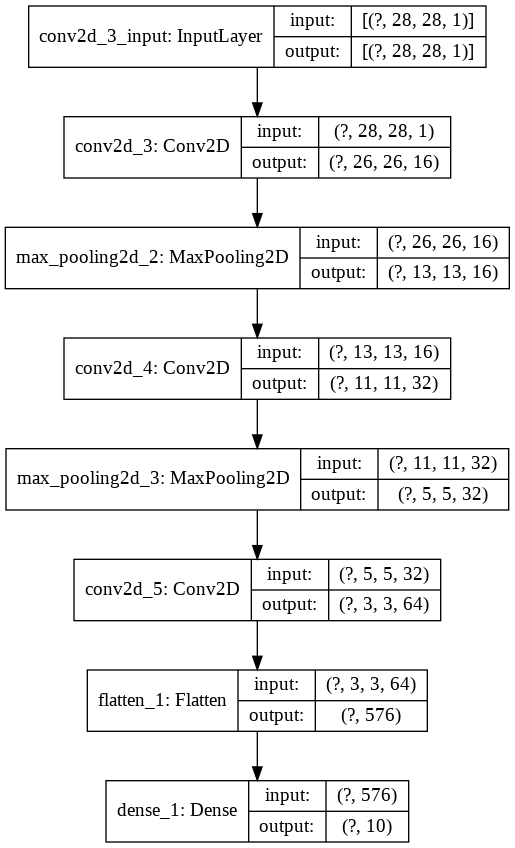

In [5]:
# The symbolic way of forming the model is also exactly the same
inputs = keras.Input(shape=(28,28,1))
model = build_model_symbolic(inputs)

# As input "layer" has not been specified as a part of the model, the model has no clue of its shapes.. so model.build needs to be called
model.build(inputs.shape)
model.summary()
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            multiple                  160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_10 (Conv2D)           multiple                  4640      
_________________________________________________________________
conv2d_11 (Conv2D)           multiple                  18496     
_________________________________________________________________
dense_2 (Dense)              multiple                  5770      
Total params: 29,066
Trainable params: 29,066
Non-trainable params: 0
_________________________________________________________________


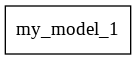

In [13]:
# We will look at a third form of creating the keras model, the Model subclass type
# The tf.keras.Model class requires __init__ and call objects to define 
class myModel(tf.keras.Model):

    def __init__(self):
        super(myModel, self).__init__() #calls the init of the super class
        # define layers
        self.conv_layer1 = layers.Conv2D(16, 3, activation="relu")
        self.max_pool = layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2))
        self.conv_layer2 = layers.Conv2D(32, 3, activation="relu") 
        self.conv_layer3 = layers.Conv2D(64, 3, activation="relu")
        self.dense1 = layers.Dense(10)

    def call(self, inputs):
        x = self.conv_layer1(inputs)
        x = self.max_pool(x)
        x = self.conv_layer2(x)
        x = self.max_pool(x)
        x = self.conv_layer3(x)
        x = layers.Flatten()(x)
        x = self.dense1(x)

        return x


model = myModel()
model.build(inputs.shape)
model.summary()
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True) # Nothing useful is output

In [14]:
# A nice blog summarizing the differences in the APIs https://blog.tensorflow.org/2019/01/what-are-symbolic-and-imperative-apis.html
# Let us try training with the subclassing API
# compile the model
# TODO: What does compiling the model imply?: https://keras.io/api/models/model_training_apis/
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
    optimizer=keras.optimizers.Adam(), 
    metrics=["accuracy"],
)

In [15]:
# load and pre-process data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# As the data is uint8, let us convert it to float32 in numpy and to [0,1] range
x_train = np.expand_dims(x_train.astype(np.float32)/255.0, axis=3)
x_test = np.expand_dims(x_test.astype(np.float32)/255.0, axis=3)

In [16]:
# run the training
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2034 - accuracy: 0.9377 - val_loss: 0.0701 - val_accuracy: 0.9797
Epoch 2/2
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0500 - val_accuracy: 0.9853
313/313 - 2s - loss: 0.0437 - accuracy: 0.9857
Test loss: 0.04365621134638786
Test accuracy: 0.9857000112533569


To summarize, the modelsubclassing API is a bit more difficult to handle, and especially as we are working on the high level, mistakes might notbe spot. For example, the code works even without the dense layer (The network thinks there are 576 outputs, and applies sparse softmax with those outputs. 

Ideally, when working at such an high level, it is important to have better view over the entire graph, and the model.summary() might help out in that way. 